In [1]:
from seligator.training.trainer import run_training_loop
from seligator.models import baseline
from seligator.evaluate import run_tests
import tabulate

NB_EPOCHS = 20
PATIENCE = 3

a = {"a": 1.00, "b": 3.00}

def get_table(scores):
    return tabulate.tabulate([list(scores.values())], headers=(scores.keys()), tablefmt="html", floatfmt=".2f")

# Baseline: only token

## Training

In [2]:
model, dataset_reader = run_training_loop(
    build_model=baseline.build_model,
    cuda_device=0,
    use_only=("token", ),
    num_epochs=NB_EPOCHS, patience=PATIENCE
)

Reading data
Building the vocabulary


/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/allennlp/data/token_indexers/token_characters_indexer.py:55: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  warnings.warn(


building vocab:   0%|          | 0/2034 [00:00<?, ?it/s]

Building the model
Starting training


  0%|          | 0/170 [00:00<?, ?it/s]

/home/thibault/dev/est-lascivuum-non-est/seligator/models/baseline.py:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Finished training


## Evaluating

Evaluating


0it [00:00, ?it/s]

Encountered the loss key in the model's return dictionary which couldn't be split by the batch size. Key will be ignored.


{'accuracy': 0.7413575042158516, 'precision-negative': 0.7842820286750793, 'precision-positive': 0.6610169410705566, 'recall-negative': 0.8123953342437744, 'recall-positive': 0.6208072900772095, 'fscore-negative': 0.7980912327766418, 'fscore-positive': 0.6402814388275146, 'loss': 0.5647232496756024}
Evaluating: Predicting


/home/thibault/dev/est-lascivuum-non-est/seligator/evaluate.py:75: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  disp.figure_.show()


accuracy,precision-negative,precision-positive,recall-negative,recall-positive,fscore-negative,fscore-positive,loss
0.74,0.78,0.66,0.81,0.62,0.80,0.64,0.56


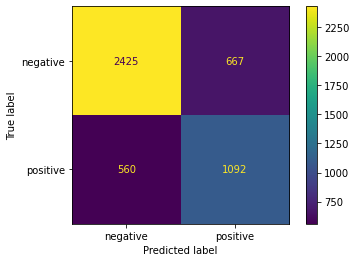

In [3]:
scores, _ = run_tests("dataset/split/test.txt", dataset_reader=dataset_reader, model=model)

get_table(scores)

In [4]:
del model 

# Multiple-Features

## Training

In [5]:
model, dataset_reader = run_training_loop(
    build_model=baseline.build_model,
    cuda_device=0,
    use_only=("token", "lemma", "tense", "case", "gend", "numb"),
    num_epochs=NB_EPOCHS, patience=PATIENCE
)

/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/allennlp/data/token_indexers/token_characters_indexer.py:55: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  warnings.warn(


Reading data
Building the vocabulary


building vocab:   0%|          | 0/2034 [00:00<?, ?it/s]

Building the model
Starting training


  0%|          | 0/170 [00:00<?, ?it/s]

/home/thibault/dev/est-lascivuum-non-est/seligator/models/baseline.py:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Finished training


## Evaluating

Evaluating


0it [00:00, ?it/s]

{'accuracy': 0.7419898819561551, 'precision-negative': 0.7405080795288086, 'precision-positive': 0.7469990849494934, 'recall-negative': 0.9082077145576477, 'recall-positive': 0.45992040634155273, 'fscore-negative': 0.8158290982246399, 'fscore-positive': 0.5693174004554749, 'loss': 0.5339332373206571}
Evaluating: Predicting


/home/thibault/dev/est-lascivuum-non-est/seligator/evaluate.py:75: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  disp.figure_.show()


accuracy,precision-negative,precision-positive,recall-negative,recall-positive,fscore-negative,fscore-positive,loss
0.74,0.74,0.75,0.91,0.46,0.82,0.57,0.53


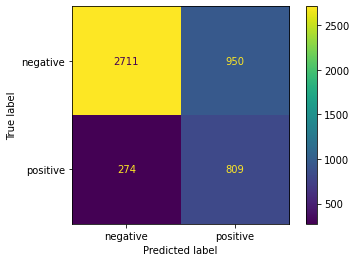

In [6]:
scores, _ = run_tests("dataset/split/test.txt", dataset_reader=dataset_reader, model=model)

get_table(scores)

# CNN Multiple Features

## Training

In [9]:
model, dataset_reader = run_training_loop(
    build_model=baseline.build_model_cnn,
    cuda_device=0,
    use_only=("token", "lemma", "tense", "case", "gend", "numb"),
    num_epochs=NB_EPOCHS, patience=PATIENCE
)

/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/allennlp/data/token_indexers/token_characters_indexer.py:55: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  warnings.warn(


Reading data
Building the vocabulary


building vocab:   0%|          | 0/2034 [00:00<?, ?it/s]

Building the model
Starting training


  0%|          | 0/170 [00:00<?, ?it/s]

/home/thibault/dev/est-lascivuum-non-est/seligator/models/baseline.py:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Finished training


## Evaluating

Evaluating


0it [00:00, ?it/s]

{'accuracy': 0.7837268128161888, 'precision-negative': 0.795832097530365, 'precision-positive': 0.7557571530342102, 'recall-negative': 0.8827470541000366, 'recall-positive': 0.6156907081604004, 'fscore-negative': 0.8370394706726074, 'fscore-positive': 0.6785714626312256, 'loss': 0.500827234979675}
Evaluating: Predicting


/home/thibault/dev/est-lascivuum-non-est/seligator/evaluate.py:75: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  disp.figure_.show()


accuracy,precision-negative,precision-positive,recall-negative,recall-positive,fscore-negative,fscore-positive,loss
0.78,0.80,0.76,0.88,0.62,0.84,0.68,0.50


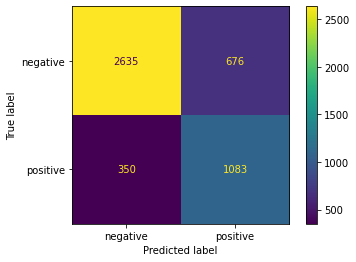

In [10]:
scores, _ = run_tests("dataset/split/test.txt", dataset_reader=dataset_reader, model=model)

get_table(scores)